# Titanic dataset EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing data and understanding the nature of variables

In [2]:
df1 = pd.read_csv('./train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Age,cabin and embarked have null values
| Age can be filled with mean values, and embaked with mode of the data
| Name, Ticket and passenger ID seem to be redundant in the study**

In [5]:
print(df1.Pclass.nunique(),df1.Embarked.nunique(),df1.Sex.nunique())

3 3 2


In [6]:
df1.Embarked.unique()
#print(df1.Ticket.tolist())

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
#df1[df1['Sex']=='male'].Age.mean() #30.72
#df1[df1['Sex']=='female'].Age.mean() #27.91

In [8]:
print(df1.Sex.value_counts(),'\n')
print(df1.Pclass.value_counts(),'\n')
print(df1.Embarked.value_counts(),'\n')

male      577
female    314
Name: Sex, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

S    644
C    168
Q     77
Name: Embarked, dtype: int64 



<AxesSubplot:xlabel='Sex'>

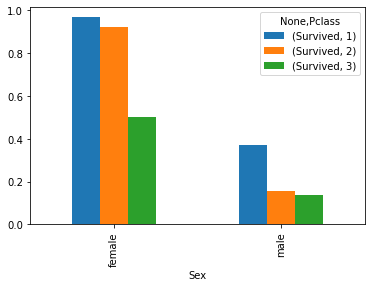

In [9]:
pd.pivot_table(df1,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.mean).plot(kind = 'bar')

**Females with cabin class 1 had very high chance sof survival and generally as the cabin class loweres the chance of survival also lower. Also over all survival chances of female is high.**

<AxesSubplot:xlabel='Embarked'>

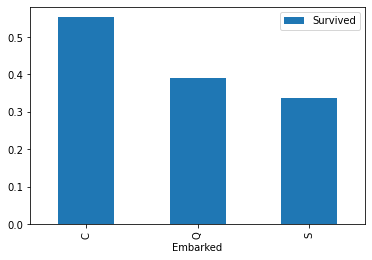

In [10]:
pd.pivot_table(df1,index=['Embarked'],values=['Survived'],aggfunc=np.mean).plot(kind = 'bar')

<AxesSubplot:ylabel='Count'>

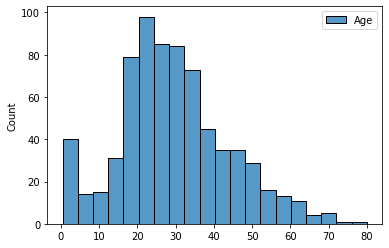

In [11]:
sns.histplot([df1.Age])

In [12]:
#segregating people based on age into 3 segments, ignoring null values for now
def age_seg(x):
    if x<10:
        return 0
    elif x>=10 and x<50:
        return 1
    elif x>50:
        return 2
    return 3
    
df1['age_seg'] = df1.Age.apply(age_seg)
df1['age_seg'].value_counts()

1    578
3    187
2     64
0     62
Name: age_seg, dtype: int64

<AxesSubplot:xlabel='age_seg'>

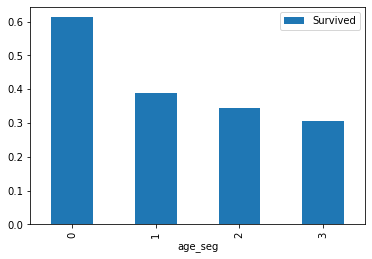

In [13]:
pd.pivot_table(df1,index=['age_seg'],values=['Survived'],aggfunc=np.mean).plot(kind = 'bar')

**As seen here lower age group children also had a higher chance of survival.**

<AxesSubplot:ylabel='Count'>

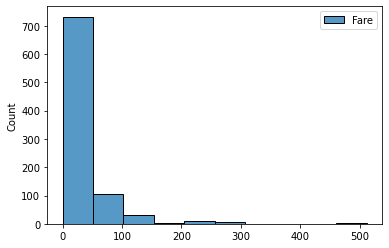

In [14]:
sns.histplot([df1.Fare], bins = 10)

In [15]:
#segregating people based on Fare into 3 segments
q1 = df1.Fare.quantile(0.33)
q2 = df1.Fare.quantile(0.66)
def fare_seg(x):
    if x<q1:
        return 0
    elif x>=q1 and x<q2:
        return 1
    elif x>=q2:
        return 2
    return 3
    
df1['fare_seg'] = df1.Fare.apply(fare_seg)
df1['fare_seg'].value_counts()

2    326
0    294
1    271
Name: fare_seg, dtype: int64

<AxesSubplot:xlabel='fare_seg'>

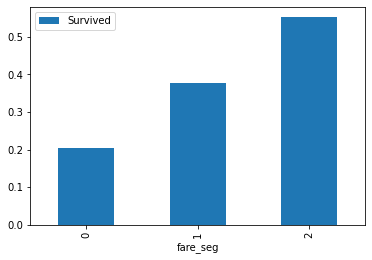

In [16]:
pd.pivot_table(df1,index=['fare_seg'],values=['Survived'],aggfunc='mean').plot(kind = 'bar')

**Again it can be seen people who payed more for the tickets had higher chances of survival (count here is similar in the 3 quantiles)**

In [17]:
df1[df1.Fare >= 400] #super high fare all survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_seg,fare_seg
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,2
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,2


In [18]:
#cabin seems to be the ID of cabins a person booked, we can take the count from here as a reference
def cabins(x):
    if pd.isna(x):
        return 0
    else:
        return 1#len(x.split(' '))
df1['ncab'] = df1.Cabin.apply(cabins)
df1.ncab.value_counts()

0    687
1    204
Name: ncab, dtype: int64

<AxesSubplot:xlabel='ncab'>

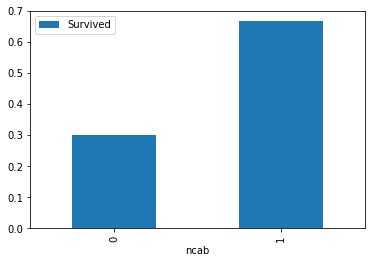

In [19]:
pd.pivot_table(df1,index=['ncab'],values=['Survived'],aggfunc='mean').plot(kind = 'bar')

**People who booked a cabin had higher chances of survival it seems**

In [20]:
pd.pivot_table(df1, index = ['ncab'], columns = ['fare_seg'], values = ['Survived'], aggfunc = 'mean')

Survived                    
fare_seg         0         1         2
ncab                                  
0         0.207018  0.344000  0.401316
1         0.111111  0.761905  0.683908

<AxesSubplot:>

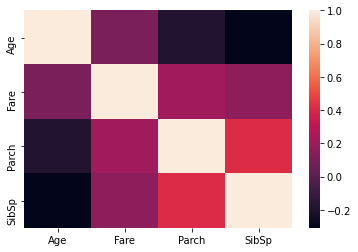

In [21]:
sns.heatmap(df1[['Age','Fare', 'Parch', 'SibSp']].corr())

### Data preprocessing for the model

In [22]:
df2 = pd.read_csv('./train.csv')
dft1 = pd.read_csv('./test.csv')
def preprocess(dfin):
    dfi = dfin.copy(deep = True)
    dfi.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    dfi['Cabin'] = dfi.Cabin.apply(cabins)
    dfi.Age.fillna(dfi.Age.mean(), inplace = True)
    dfi.Embarked.replace({'S': 1, 'C':2, 'Q':3, np.nan:1}, inplace = True)
    dfi.Fare.fillna(dfi.Fare.mean(), inplace = True)
    dfi.dropna(axis = 0, inplace = True)
    dfi['Sex'] = dfi.Sex.apply(lambda x: 0 if x=='male' else 1)
    return dfi

df2 = preprocess(df2)

In [23]:
dft = preprocess(dft1)

In [24]:
X_test = dft
len(X_test)

418

### Training models for prediction

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [26]:
X_train = df2.drop(['Survived'], axis = 1)
y_train = df2['Survived']

In [27]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75977654 0.75280899 0.79213483 0.79213483 0.80337079]
0.7800451949030193


In [28]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.78651685 0.79213483 0.78089888 0.82022472]
0.7979662293641329


In [29]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.73743017 0.76966292 0.83707865 0.76404494 0.84269663]
0.7901826627330363


In [30]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.62011173 0.65168539 0.70786517 0.71910112 0.7247191 ]
0.6846965036720859


In [31]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75977654 0.78651685 0.85393258 0.76966292 0.85955056]
0.8058878915322328


In [32]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.58659218 0.71348315 0.69101124 0.68539326 0.69101124]
0.6734982110350888


In [33]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 

In [34]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.73184358 0.78089888 0.83146067 0.80898876 0.83707865]
0.7980541083422259


In [35]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('gnb', GaussianNB()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [37]:
y_hat_base_vc = voting_clf.predict(X_test).astype(int)
basic_submission = {'PassengerId': dft1.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(basic_submission)
base_submission.to_csv('base_submission.csv', index=False)